In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
#import data
df = pd.read_csv('weight-height.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
df['Height'].mean() #liat nilai rata rata

66.36755975482124

In [4]:
df['Height'].median()

66.31807008178464

In [5]:
df['Height'].mode()

0       54.263133
1       54.616858
2       54.873728
3       55.148557
4       55.336492
          ...    
9995    78.095867
9996    78.462053
9997    78.528210
9998    78.621374
9999    78.998742
Name: Height, Length: 10000, dtype: float64

In [6]:
#ngitung kuartil pertama (Q1)
q1= df['Height'].quantile(0.25)
print("Q1 : " ,q1)
#ngitung kuartil ketiga (Q3)
q3= df['Height'].quantile(0.75)
print("Q3 : " , q3)
#inter quartil range
iqr= q3-q1
print("IQR: ", iqr)


Q1 :  63.505620481218955
Q3 :  69.1742617268347
IQR:  5.668641245615746


In [7]:
#ngitung kuartil pertama (Q1)
q1= df['Height'].quantile(0.25)
print("Q1 : " ,q1)
#ngitung kuartil ketiga (Q3)
q3= df['Height'].quantile(0.75)
print("Q3 : " , q3)
#inter quartil range
iqr= q3-q1
print("IQR: ", iqr)


Q1 :  63.505620481218955
Q3 :  69.1742617268347
IQR:  5.668641245615746


<Axes: >

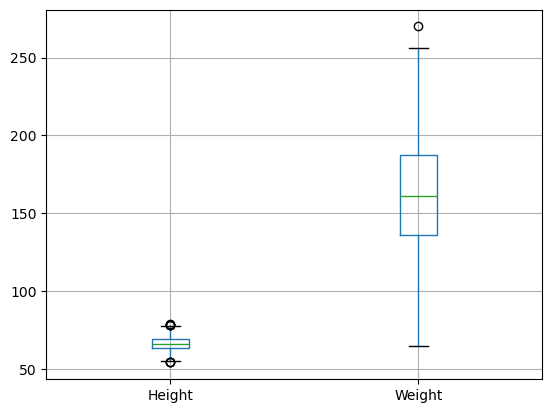

In [8]:
#buat boxplot
df.boxplot(column=['Height','Weight'])

In [9]:
#Nambahin Outlier
outlier_data={
    'Gender':["male","Female","male","Female"],
    'Height':[51,155,45,160],
    'Weight':[33,320,30,335],
    'index':[1,5,2,5]
}

outlier_df= pd.DataFrame(outlier_data)

df = pd.concat([df,outlier_df], ignore_index= True)
df



,Gender,Height,Weight,index
0,Male,73.847017,241.893563,NaN
1,Male,68.781904,162.310473,NaN
2,Male,74.110105,212.740856,NaN
3,Male,71.730978,220.042470,NaN
4,Male,69.881796,206.349801,NaN
...,...,...,...,...
9999,Female,61.944246,113.649103,NaN
10000,male,51.000000,33.000000,1.0
10001,Female,155.000000,320.000000,5.0
10002,male,45.000000,30.000000,2.0


In [10]:
df.describe

<bound method NDFrame.describe of        Gender      Height      Weight  index
0        Male   73.847017  241.893563    NaN
1        Male   68.781904  162.310473    NaN
2        Male   74.110105  212.740856    NaN
3        Male   71.730978  220.042470    NaN
4        Male   69.881796  206.349801    NaN
...       ...         ...         ...    ...
9999   Female   61.944246  113.649103    NaN
10000    male   51.000000   33.000000    1.0
10001  Female  155.000000  320.000000    5.0
10002    male   45.000000   30.000000    2.0
10003  Female  160.000000  335.000000    5.0

[10004 rows x 4 columns]>

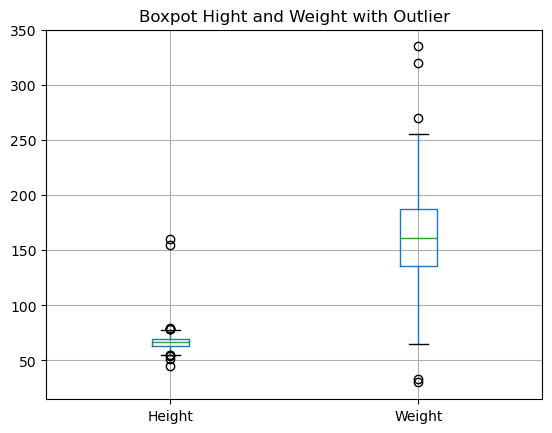

In [11]:
#buat boxplot
df.boxplot(column=['Height','Weight'])
plt.title('Boxpot Hight and Weight with Outlier')
plt.show()

In [12]:
#ngitung kuartil pertama (Q1)
q1= df['Height'].quantile(0.25)
print("Q1 : " ,q1)
#ngitung kuartil ketiga (Q3)
q3= df['Height'].quantile(0.75)
print("Q3 : " , q3)
#inter quartil range
iqr= q3-q1
# Menghitung batas bawah(Lower Bound) dan batas atas(Upper Bound)untuk Outlier
lower_bound= q1 - 1.5 * iqr
upper_bound= q3 + 1.5 * iqr

#Menemukan Outlier dalam DataFrame
outliers= df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]
# disini cuma yang diliat kolom height aja blom yang lain
print("Outlier Height: ")
print(outliers)


Q1 :  63.50477262025402
Q3 :  69.17720151692626
Outlier Height: 
       Gender      Height      Weight  index
994      Male   78.095867  255.690835    NaN
1317     Male   78.462053  227.342565    NaN
2014     Male   78.998742  269.989699    NaN
3285     Male   78.528210  253.889004    NaN
3757     Male   78.621374  245.733783    NaN
6624   Female   54.616858   71.393749    NaN
7294   Female   54.873728   78.606670    NaN
9285   Female   54.263133   64.700127    NaN
10000    male   51.000000   33.000000    1.0
10001  Female  155.000000  320.000000    5.0
10002    male   45.000000   30.000000    2.0
10003  Female  160.000000  335.000000    5.0


In [13]:
df.describe()

,Height,Weight,index
count,10004.000000,10004.000000,4.000000
mean,66.382107,161.447578,3.250000
std,4.065510,32.240357,2.061553
min,45.000000,30.000000,1.000000
25%,63.504773,135.812408,1.750000
50%,66.318070,161.212928,3.500000
75%,69.177202,187.188859,5.000000
max,160.000000,335.000000,5.000000


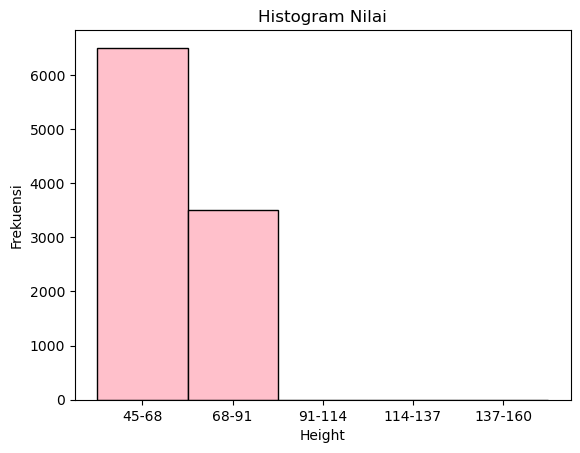

In [14]:
data_height = df['Height']
# Buat Histogram
n, bins, patches = plt.hist(data_height, bins=5, color='pink', edgecolor='black')

# Tambahkan label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

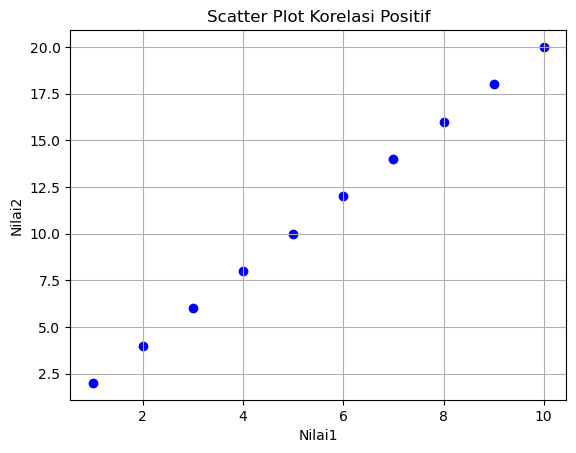

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {
    'Nilai1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Nilai1'], df['Nilai2'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()


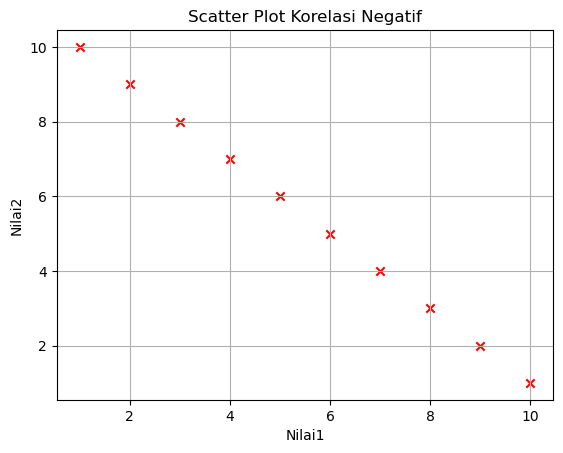

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {
    'Nilai1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Nilai1'], df['Nilai2'], color='red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tampilkan plot
plt.grid(True)
plt.show()
